In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
# 데이터셋 데이터 경로
dataset_dir = '/content/drive/MyDrive/caltech101'
train_dir = os.path.join(dataset_dir, 'train')

In [3]:
# 사진 크기
image_width = 100
image_height = 100

# ImageDataGenerator 초기화
# 0~1 사이로 숫자값 변경
train_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# 훈련셋 제너레이터
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=30,
    class_mode='categorical')

Found 1800 images belonging to 10 classes.


In [5]:
# 훈련셋에서 배치를 생성
for data_batch, labels_batch in train_generator:
    break

In [6]:
# 데이터 배치의 크기
# (배치개수, 이미지너비, 이미지높이, RGB채널)
data_batch.shape

(30, 100, 100, 3)

In [7]:
# 라벨 배치의 크기
# (배치개수, 카테고리개수)
labels_batch.shape

(30, 10)

In [8]:
# 첫 번째 데이터 배치 출력
data_batch[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [10]:
# 첫 번째 라벨 배치 출력
labels_batch[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [11]:
# 라벨 이름 목록
labels_list = train_generator.class_indices
labels_list

{'airplane': 0,
 'bonsai': 1,
 'car': 2,
 'chandelier': 3,
 'face': 4,
 'ketch': 5,
 'leopard': 6,
 'motorbike': 7,
 'turtle': 8,
 'watch': 9}

In [12]:
# 라벨 이름 목록 스왑
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list

{0: 'airplane',
 1: 'bonsai',
 2: 'car',
 3: 'chandelier',
 4: 'face',
 5: 'ketch',
 6: 'leopard',
 7: 'motorbike',
 8: 'turtle',
 9: 'watch'}

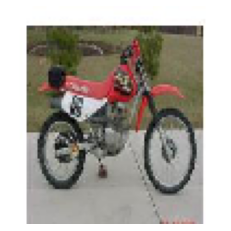

'motorbike'

In [28]:
# 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.axis('off')
plt.show()


# 첫 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[0])]

'motorbike'

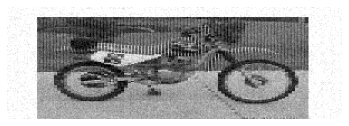

In [21]:
# data_augmentation을 사용하여 데이터 셋의 규모를 증가
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(stddev=0.05) #0 Mean
    
])
aug_img = data_augmentation(data_batch[0], training=True) #data augmentation은 학습/ training 때만 사용
aug_img = tf.reshape(aug_img, shape=(100,-1))
plt.axis('off')
plt.imshow(aug_img, cmap= 'gray', vmin=0, vmax=1.0)

# 첫 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[0])]

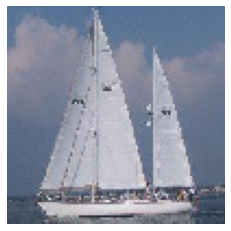

'ketch'

In [29]:
# 두 번째 이미지 출력
image = data_batch[1]

plt.imshow(image)
plt.axis('off')
plt.show()


# 두 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[1])]

'ketch'

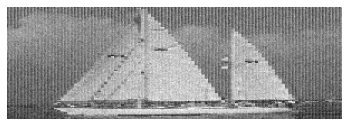

In [22]:
# data_augmentation을 사용하여 데이터 셋의 규모를 증가
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(stddev=0.05) #0 Mean
    
])
aug_img = data_augmentation(data_batch[1], training=True) #data augmentation은 학습/ training 때만 사용
aug_img = tf.reshape(aug_img, shape=(100,-1))
plt.axis('off')
plt.imshow(aug_img, cmap= 'gray', vmin=0, vmax=1.0)

# 두 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[1])]

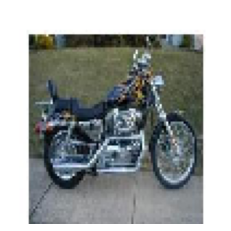

'motorbike'

In [16]:
# 열 번째 이미지 출력
image = data_batch[9]

plt.imshow(image)
plt.axis('off')
plt.show()


# 열 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[9])]

'motorbike'

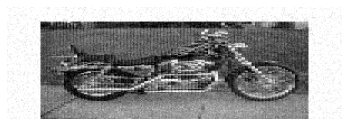

In [23]:
# data_augmentation을 사용하여 데이터 셋의 규모를 증가
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(stddev=0.05) #0 Mean
    
])
aug_img = data_augmentation(data_batch[9], training=True) #data augmentation은 학습/ training 때만 사용
aug_img = tf.reshape(aug_img, shape=(100,-1))
plt.axis('off')
plt.imshow(aug_img, cmap= 'gray', vmin=0, vmax=1.0)

# 첫 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[9])]

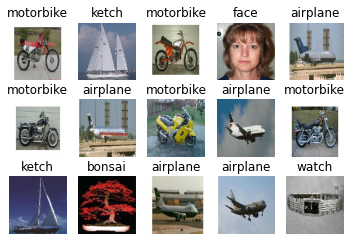

In [35]:
# 출력할 크기 설정
rows = 3
columns = 5

# 사진을 목록으로 출력
for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break
    
    plt.subplot(rows, columns, num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(image_width, image_height, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer='rmsprop', loss=loss_fn, metrics=['accuracy'])
model.fit_generator(train_generator, steps_per_epoch=60, epochs=40)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)      

<ipython-input-24-fc1a8eed5272>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60, epochs=40)


Epoch 1/40


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


60/60 [==============================] - 274s 5s/step - loss: 2.0161 - accuracy: 0.2961
Epoch 2/40
60/60 [==============================] - 21s 355ms/step - loss: 1.5268 - accuracy: 0.4844
Epoch 3/40
60/60 [==============================] - 22s 357ms/step - loss: 1.0597 - accuracy: 0.6500
Epoch 4/40
60/60 [==============================] - 22s 364ms/step - loss: 0.7120 - accuracy: 0.7683
Epoch 5/40
60/60 [==============================] - 22s 363ms/step - loss: 0.5396 - accuracy: 0.8233
Epoch 6/40
60/60 [==============================] - 22s 357ms/step - loss: 0.4013 - accuracy: 0.8717
Epoch 7/40
60/60 [==============================] - 22s 358ms/step - loss: 0.3343 - accuracy: 0.8922
Epoch 8/40
60/60 [==============================] - 21s 353ms/step - loss: 0.2626 - accuracy: 0.9106
Epoch 9/40
60/60 [==============================] - 21s 356ms/step - loss: 0.2252 - accuracy: 0.9261
Epoch 10/40
60/60 [==============================] - 22s 357ms/step - loss: 0.1602 - accuracy: 0.9494
Ep